# 第4章 母集団と平均

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import sys
import os
import math
import datetime as dt

import numpy as np
import scipy
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from bokeh.io import output_notebook, show
#from bokeh.plotting import figure

sns.set(font_scale=1.5)
#plt.rcParams['font.family'] = 'IPAexGothic'

### 正規分布

In [42]:
# 正規母集団からの無作為抽出
values1 = np.random.normal(loc=50, scale=10, size=5)
values1

array([ 50.98589203,  52.72573252,  69.79187996,  31.20084473,  48.78027819])

In [43]:
# もう１度行うと全く違うデータが抽出される
values2 = np.random.normal(loc=50, scale=10, size=5)
values2

array([ 49.67434162,  64.32879224,  44.4405884 ,  50.86436091,  31.50725883])

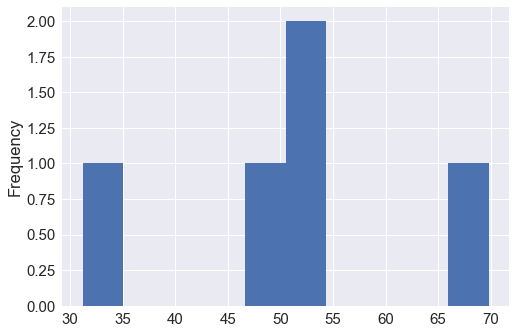

In [46]:
fig, ax = plt.subplots()
ax.hist(values1)
ax.set_ylabel('Frequency')

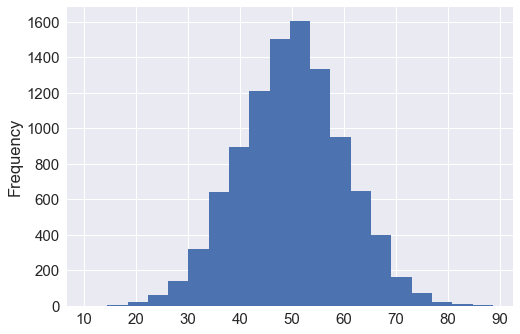

In [19]:
# サンプルサイズを10000に増やす
values3 = np.random.normal(loc=50, scale=10, size=10000)
fig, ax = plt.subplots()
ax.hist(values3, bins=20)
ax.set_ylabel('Frequency')

In [51]:
# 正規母集団の母平均, 母標準偏差の推定 => フィッテイング関数を使う
param1 = scipy.stats.norm.fit(values1)
param2 = scipy.stats.norm.fit(values2)
param3 = scipy.stats.norm.fit(values3)
param1, param2, param3

((50.696925483714281, 12.268557760937167),
 (48.163068398526079, 10.603625842803806),
 (49.998284744114102, 10.004059347821485))

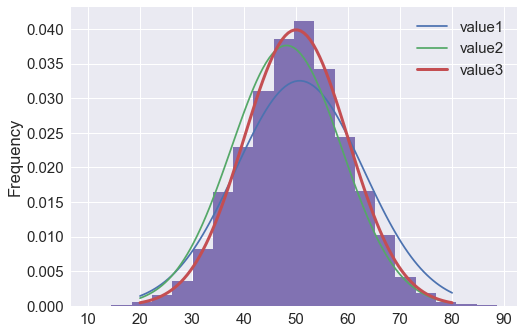

In [63]:
# サンプル数が多いほど推定値の精度も上がる
x = np.linspace(20,80,100)
pdf_fitted1 = scipy.stats.norm.pdf(x, loc=param1[0], scale=param1[1])
pdf_fitted2 = scipy.stats.norm.pdf(x, loc=param2[0], scale=param2[1])
pdf_fitted3 = scipy.stats.norm.pdf(x, loc=param3[0], scale=param3[1])

fig, ax = plt.subplots()
ax.plot(x, pdf_fitted1, label='value1')
ax.plot(x, pdf_fitted2, label='value2')
ax.plot(x, pdf_fitted3, label='value3', linewidth=3)
ax.hist(values3, normed=1, bins=20)
ax.set_ylabel('Frequency')
ax.legend()

### 標本平均の分布

In [89]:
def get_sample_means(size=1):
    ranged = range(0, 10000)
    sample_means = np.asarray([np.nan for _ in ranged])
    for count in ranged:
        samples = np.random.normal(size=size, loc=50, scale=10)
        sample_means[count] = np.mean(samples)
    return sample_means

In [142]:
# サンプルサイズ=10のときの標本平均の分散は約10.0
sample_means = get_sample_means(size=10)
sample_means.var(ddof=0), sample_means.std(ddof=0)

(9.6170257757921096, 3.1011329826036338)

In [144]:
# サンプルサイズ=100のときの標本平均の分散は約1.0
# => サンプルサイズ=10のときと比べて分散は1/10倍, 標準誤差は1/√10倍
# => 標準誤差は，標本分布の標準偏差として定義される
sample_means = get_sample_means(size=100)
sample_means.var(ddof=0), sample_means.std(ddof=0)

(1.0029971415908037, 1.0014974496177229)

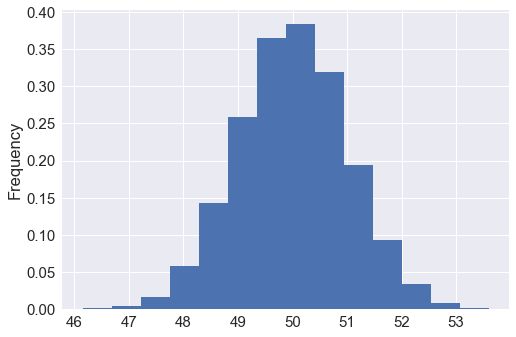

In [92]:
fig, ax = plt.subplots()
ax.hist(sample_means, normed=1, bins=14)
ax.set_ylabel('Frequency')

- 母集団の推定量として標本平均を用いる場合，母集団がどのようなものであっても，その標準誤差が $\frac{\sigma}{\sqrt{n}}$ となる
- ただし，標本平均の標本分布がどのような形になるかはわからない
- しかし，$n$ が大きいときには，母集団分布が正規分布でなくても標本平均の標本分布はほぼ正規分布になる．これは **中心極限定理** とよばれる定理で証明されている

### 分散の標本分布

In [127]:
def get_sample_variances(size=1):  
    ranged = range(0, 10000)
    sample_vars = np.asarray([np.nan for _ in ranged]) # 標本分散
    unbiased_vars = np.asarray([np.nan for _ in ranged]) # 不偏分散
    for count in ranged:
        samples = np.random.normal(size=size, loc=50, scale=10)
        sample_vars[count] = samples.var(ddof=0)
        unbiased_vars[count] = samples.var(ddof=1)
    return sample_vars, unbiased_vars

In [128]:
sample_vars, unbiased_vars = get_sample_variances(size=10)
sample_vars.mean(), unbiased_vars.mean()

(90.195963335137606, 100.21773703904178)

母分散の本当の値は100なので，母分散の推定量としては不偏分散の方がよいと言える

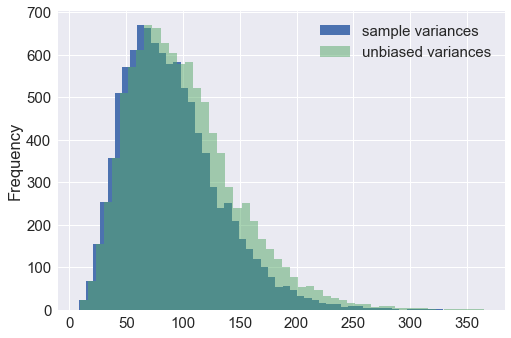

In [139]:
fig, ax = plt.subplots()
ax.hist(sample_vars, label='sample variances', bins=50)
ax.hist(unbiased_vars, label='unbiased variances', bins=50, alpha=0.5)
ax.set_ylabel('Frequency')
ax.legend()

### 中央値の標本分布

In [147]:
def get_sample_means_and_medians(size=1):  
    ranged = range(0, 10000)
    sample_means = np.asarray([np.nan for _ in ranged]) # 平均
    sample_medians = np.asarray([np.nan for _ in ranged]) # 中央値
    for count in ranged:
        samples = np.random.normal(size=size, loc=50, scale=10)
        sample_means[count] = samples.mean()
        sample_medians[count] = np.median(samples)
    return sample_means, sample_medians

In [149]:
# 中央値でも母平均の(不偏)推定量となっていると言えそう
sample_means, sample_medians = get_sample_means_and_medians(size=10)
sample_means.mean(), sample_medians.mean()

(50.004054484085579, 49.997201140178504)

In [150]:
# 中央値の標準誤差は，平均と比べると大きくなる
sample_means.std(ddof=1), sample_medians.std(ddof=1)

(3.1395373273127172, 3.6910003951703785)